In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline




In [0]:
np.random.seed(42)

In [0]:
plt.style.use('ggplot')

# Getting the Data

In [0]:
DATA_PATH = os.path.join('data')

In [0]:
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,'stats.csv')
    return pd.read_csv(csv_path)


In [0]:
#Using the raw data uploaded on github

URL = "https://raw.githubusercontent.com/am7249/Moneyball/master/data/stats.csv" #data for teams

def load_data_colab(data_path=URL):
    return pd.read_csv(data_path)

In [0]:
epl_data = load_data_colab()

In [0]:
"""Adding another variable, GF (Goal Difference) = Goals Scored - Goals Conceded"""

epl_data['GD'] = epl_data['goals'] - epl_data['goals_conceded']
epl_data.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,CL,GD
0,Manchester United,28,5,83,60,1,698,256,21,12,5,1,72,11,9,80,16,27,2.0,81,254,890,1,1222,NaN,1,5,3,18723,NaN,2397,NaN,918,258,25686,NaN,1,NaN,2,37,25,2006-2007,1,56
1,Chelsea,24,3,64,62,4,636,216,14,16,3,6,41,23,6,127,22,24,4.0,74,292,982,0,1206,NaN,1,3,2,16759,NaN,2270,NaN,897,231,24010,NaN,2,NaN,1,74,22,2006-2007,1,40
2,Liverpool,20,10,57,44,0,668,214,15,8,6,1,46,11,3,120,20,27,1.0,65,246,969,2,1115,NaN,0,1,1,17154,NaN,2800,NaN,1107,282,24150,NaN,1,NaN,0,51,27,2006-2007,1,30
3,Arsenal,19,8,63,59,3,638,226,19,10,10,3,53,10,7,111,12,35,6.0,73,214,998,1,1202,NaN,1,3,3,18458,NaN,2045,NaN,873,278,25592,NaN,1,NaN,0,88,27,2006-2007,1,28
4,Tottenham Hotspur,17,12,57,48,3,520,184,6,5,6,2,44,13,9,149,6,54,11.0,128,276,995,2,1412,NaN,2,7,6,14914,NaN,2408,NaN,796,181,22200,NaN,2,NaN,0,51,24,2006-2007,0,3


In [0]:
"""epl_data = load_data()
epl_data['GD'] = epl_data['goals'] - epl_data['goals_conceded']
epl_data.head()"""

"epl_data = load_data()\nepl_data['GD'] = epl_data['goals'] - epl_data['goals_conceded']\nepl_data.head()"

# Preparing the Training Set and Test Set

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(epl_data, test_size=0.1, random_state=42)
print("Shape of the training data: {} Data Points, {} Covariates".format(train_data.shape[0], train_data.shape[1]))

Shape of the training data: 216 Data Points, 44 Covariates


# Understanding the Data and Preparing it for Modeling

In [0]:
print("List of covariates: {}".format(list(train_data.columns)))
print("Number of covariates: {}".format(len(train_data.columns)))

List of covariates: ['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card', 'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal', 'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet', 'goals_conceded', 'saves', 'outfielder_block', 'interception', 'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance', 'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass', 'total_through_ball', 'total_long_balls', 'backward_pass', 'total_cross', 'corner_taken', 'touches', 'big_chance_missed', 'clearance_off_line', 'dispossessed', 'penalty_save', 'total_high_claim', 'punches', 'season', 'CL', 'GD']
Number of covariates: 44


In [0]:
"""basic descriptive statistics of out training set"""
train_data.describe()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,CL,GD
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,197.000000,216.000000,216.000000,216.000000,216.000000,216.000000,200.000000,216.000000,216.000000,216.000000,216.000000,200.000000,216.000000,143.000000,216.000000,216.000000,216.000000,143.000000,216.000000,200.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,14.212963,14.138889,51.398148,61.444444,2.884259,517.245370,169.157407,12.347222,8.888889,3.759259,1.518519,43.708333,7.712963,3.023148,85.986111,10.912037,51.189815,52.385787,131.356481,561.898148,763.111111,5.958333,1255.097222,676.490000,1.986111,4.708333,3.606481,15824.361111,86.590000,2288.481481,2483.496503,827.912037,207.310185,24085.800926,39.412587,4.902778,473.280000,0.833333,54.921296,22.902778,0.222222,0.208333
std,6.201352,5.744900,16.755667,9.955093,1.835194,98.707272,39.828274,4.937261,3.614784,2.105896,1.336302,14.707793,3.713084,2.488003,20.703326,4.268505,13.582002,56.594092,32.433513,138.428754,105.904067,5.571783,332.004448,185.512681,1.470577,2.241911,1.926016,3232.061217,66.934393,298.021257,506.856355,119.168541,36.679391,3256.197692,13.650222,2.772756,83.542193,0.940064,19.031878,9.402364,0.416705,27.425639
min,1.000000,2.000000,20.000000,40.000000,0.000000,338.000000,94.000000,4.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,38.000000,2.000000,22.000000,0.000000,53.000000,198.000000,533.000000,0.000000,588.000000,308.000000,0.000000,0.000000,0.000000,9478.000000,12.000000,1462.000000,1382.000000,572.000000,136.000000,17564.000000,18.000000,0.000000,296.000000,0.000000,20.000000,4.000000,0.000000,-69.000000
25%,10.000000,10.000000,39.000000,54.000000,1.750000,440.750000,140.750000,9.000000,6.000000,2.000000,1.000000,33.000000,5.000000,1.000000,73.000000,8.000000,41.000000,0.000000,108.000000,480.250000,682.250000,2.000000,1021.500000,542.750000,1.000000,3.000000,2.000000,13398.000000,38.750000,2070.000000,2117.500000,743.500000,179.750000,21645.000000,30.000000,3.000000,411.750000,0.000000,40.000000,16.750000,0.000000,-20.000000
50%,12.000000,15.000000,46.500000,61.000000,3.000000,499.000000,158.500000,11.500000,9.000000,4.000000,1.000000,40.000000,7.000000,2.000000,85.000000,10.000000,51.000000,9.000000,130.500000,568.500000,749.000000,4.000000,1190.000000,631.000000,2.000000,4.000000,3.000000,15047.000000,63.500000,2278.500000,2431.000000,818.000000,200.000000,23349.500000,37.000000,5.000000,466.500000,1.000000,53.000000,22.000000,0.000000,-8.000000
75%,19.000000,19.000000,63.000000,68.000000,4.000000,583.500000,196.750000,15.250000,11.000000,5.000000,2.000000,52.000000,9.000000,4.000000,96.250000,14.000000,60.000000,108.000000,154.000000,660.250000,830.750000,9.000000,1458.250000,801.250000,3.000000,6.000000,5.000000,18593.500000,114.250000,2484.000000,2860.500000,905.750000,230.000000,26587.000000,45.000000,7.000000,522.000000,1.000000,68.000000,27.000000,0.000000,22.250000
max,32.000000,29.000000,106.000000,94.000000,9.000000,834.000000,288.000000,33.000000,18.000000,11.000000,6.000000,94.000000,23.000000,12.000000,149.000000,24.000000,89.000000,176.000000,225.000000,872.000000,1089.000000,26.000000,2220.000000,1183.000000,6.000000,13.000000,11.000000,28241.000000,373.000000,3176.000000,4546.000000,1156.000000,309.000000,35130.000000,88.000000,16.000000,776.000000,5.000000

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 176 to 102
Data columns (total 45 columns):
team                    216 non-null object
wins                    216 non-null int64
losses                  216 non-null int64
goals                   216 non-null int64
total_yel_card          216 non-null int64
total_red_card          216 non-null int64
total_scoring_att       216 non-null int64
ontarget_scoring_att    216 non-null int64
hit_woodwork            216 non-null int64
att_hd_goal             216 non-null int64
att_pen_goal            216 non-null int64
att_freekick_goal       216 non-null int64
att_ibox_goal           216 non-null int64
att_obox_goal           216 non-null int64
goal_fastbreak          216 non-null int64
total_offside           216 non-null int64
clean_sheet             216 non-null int64
goals_conceded          216 non-null int64
saves                   197 non-null float64
outfielder_block        216 non-null int64
interception            216 no

From the information above, we can see that the columns with missing values are: __saves, head_clearance, total_through_ball, backward_pass, big_chance_missed, and dispossessed__.

Out of these covariates, the ones missing the most number of values are backward_pass and big_chance_missed (73 missing values out of 216). Instead of using any imputing strategy, we will go ahead and just get rid of these colums because a major proportion is missing and imputing won't add much meaning. 

For the rest, we will try an imputing strategy since the missing data does not make a big portion of the train data. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


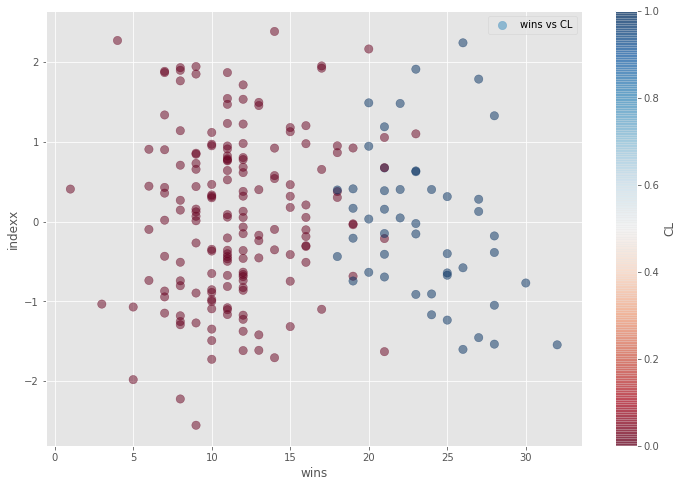

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,CL,GD
176,Hull City,8,19,33,73,6,428,131,11,10,1,0,30,3,2,72,10,51,102.0,158,607,763,2,1316,761.0,0,3,1,14864,21.0,2726,2237.0,804,169,22464,22.0,7,443.0,2,36,23,2014-2015,0,-18
150,Stoke City,13,14,45,72,5,428,137,14,2,4,2,31,14,3,81,9,52,127.0,153,474,791,5,1090,604.0,1,7,5,15324,40.0,1970,2453.0,731,164,23324,36.0,2,469.0,2,84,17,2013-2014,0,-7
10,Middlesbrough,12,16,44,64,2,454,144,7,7,4,1,37,7,3,89,9,49,18.0,119,238,841,1,1243,NaN,1,7,7,12779,NaN,2403,NaN,769,187,19199,NaN,5,NaN,0,78,37,2006-2007,0,-5
201,Tottenham Hotspur,26,4,86,62,0,669,257,22,10,7,0,74,12,3,74,17,26,85.0,99,314,661,1,1003,526.0,1,2,2,20150,45.0,2662,3130.0,761,273,28150,41.0,1,484.0,0,21,11,2016-2017,1,60
237,Southampton,7,16,37,63,2,450,145,15,7,3,1,34,3,2,73,8,56,110.0,128,462,658,4,953,509.0,1,2,1,17174,56.0,2541,2589.0,800,227,24639,37.0,4,379.0,1,29,13,2017-2018,0,-19
153,Aston Villa,10,20,39,78,0,431,135,11,10,2,3,33,6,4,84,9,61,110.0,126,460,747,4,1068,487.0,4,6,5,13856,30.0,2298,2231.0,749,163,21453,27.0,3,359.0,1,102,15,2013-2014,0,-22
96,Blackpool,10,19,55,47,2,531,161,11,8,7,3,44,11,3,97,6,78,3.0,206,451,780,7,1616,860.0,5,3,2,15113,75.0,2582,2543.0,836,183,23616,46.0,16,499.0,0,49,29,2010-2011,0,-23
228,Leicester City,12,15,56,52,5,423,149,8,9,5,1,49,7,7,92,9,60,107.0,130,413,630,1,920,487.0,2,4,2,15200,63.0,2667,2094.0,744,203,22770,35.0,4,358.0,2,29,23,2017-2018,0,-4
25,Aston Villa,16,10,71,54,4,511,182,11,16,6,5,55,16,3,115,9,51,3.0,139,461,885,0,2220,1183.0,3,4,2,11438,30.0,1982,NaN,932,229,20734,NaN,6,655.0,2,40,14,2007-2008,0,20
182,Manchester City,19,10,71,61,0,615,210,15,13,5,0,57,14,5,63,16,41,86.0,66,630,729,3,940,513.0,1,1,1,20488,84.0,2082,2895.0,866,257,28396,50.0,2,556.0,0,38,41,2015-2016,1,30


In [0]:
rng = np.random.RandomState(0)
y1 = rng.randn(len(train_data))
train_data['indexx'] = y1
train_data.plot(kind="scatter", x="wins", y="indexx", alpha=0.5, s=70,
             label="wins vs CL", figsize=(12,8), c="CL", cmap=plt.get_cmap("RdBu"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()
train_data.drop(['indexx'], axis=1)

In [0]:
"""Checking for Multicollinearity"""

corr_matrix = train_data.corr()
print(corr_matrix)

                          wins    losses  ...        GD    indexx
wins                  1.000000 -0.896048  ...  0.954687 -0.017223
losses               -0.896048  1.000000  ... -0.934358 -0.021326
goals                 0.900427 -0.828377  ...  0.923159  0.032042
total_yel_card       -0.227412  0.248264  ... -0.255092 -0.202953
total_red_card       -0.101631  0.125939  ... -0.136379 -0.097266
total_scoring_att     0.769859 -0.716825  ...  0.795976  0.017160
ontarget_scoring_att  0.835679 -0.777223  ...  0.859181  0.029947
hit_woodwork          0.526831 -0.506277  ...  0.559014 -0.022720
att_hd_goal           0.346735 -0.355819  ...  0.363131 -0.156379
att_pen_goal          0.413522 -0.401667  ...  0.448469  0.087813
att_freekick_goal     0.315516 -0.282063  ...  0.306702 -0.105813
att_ibox_goal         0.871016 -0.798687  ...  0.898246  0.025309
att_obox_goal         0.616126 -0.576375  ...  0.610339  0.048106
goal_fastbreak        0.521500 -0.505259  ...  0.540877 -0.010847
total_offs

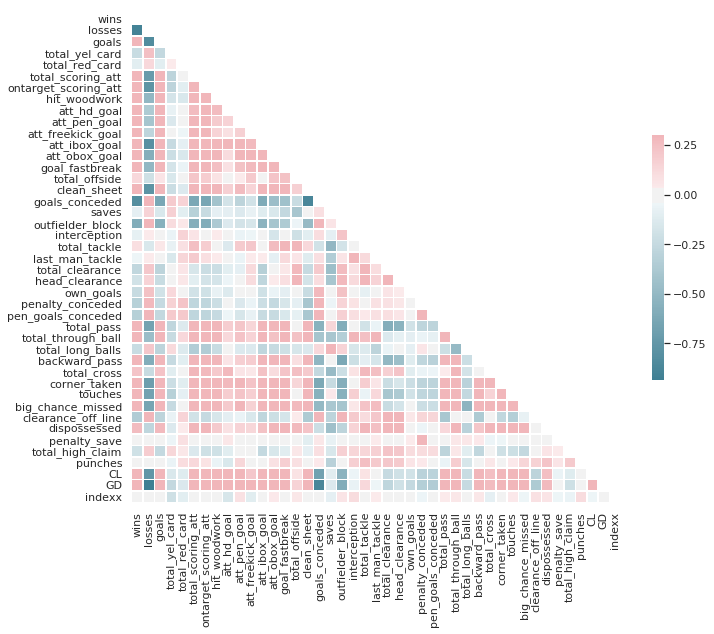

In [0]:
"""Visualizing Correlation Matrix"""

import seaborn as sns

sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [0]:
"""Function to remove the correlated covariates - address multicollinearity.
Uses VARIANCE INFLATION FACTOR (VIF) to identify the highly correlated features
and get rid of the appropriate ones"""

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [0]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf


# Model Building (1)

In [0]:
#seprating covariates from the labels
y_train_1 = train_data['CL']
y_test_1 = test_data['CL']
X_train_1 = train_data.copy()
X_test_1 = test_data.copy()

#removing labels, team names, and season from the X (covariate matrix)
X_train_1 = X_train_1.drop(['CL','team','season','indexx'],axis=1)
X_train_1 = X_train_1.fillna(method="backfill")

X_test_1 = X_test_1.drop(['CL','team','season'],axis=1)
X_test_1 = X_test_1.fillna(method="backfill")

In [0]:
X_VIF_1 = calculate_vif_(X_train_1, 10)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'goals' at index: 2
dropping 'goals_conceded' at index: 15
dropping 'touches' at index: 31
dropping 'ontarget_scoring_att' at index: 5
dropping 'corner_taken' at index: 29
dropping 'att_ibox_goal' at index: 9
dropping 'total_scoring_att' at index: 4
dropping 'total_pass' at index: 22
dropping 'total_tackle' at index: 15
dropping 'penalty_conceded' at index: 19
dropping 'total_clearance' at index: 16
dropping 'total_long_balls' at index: 20
dropping 'wins' at index: 0
dropping 'total_cross' at index: 20
dropping 'dispossessed' at index: 22
dropping 'losses' at index: 0
dropping 'total_yel_card' at index: 0
dropping 'outfielder_block' at index: 10
dropping 'backward_pass' at index: 16
dropping 'interception' at index: 10
dropping 'head_clearance' at index: 11
dropping 'total_offside' at index: 7
dropping 'clean_sheet' at index: 7
dropping 'big_chance_missed' at index: 12
Remaining variables:
Index(['total_red_card', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal',
       'att_free

In [0]:
print("The new columns that we have kept are: {}".format(list(X_VIF_1.columns)))

The new columns that we have kept are: ['total_red_card', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_obox_goal', 'goal_fastbreak', 'saves', 'last_man_tackle', 'own_goals', 'pen_goals_conceded', 'total_through_ball', 'clearance_off_line', 'penalty_save', 'total_high_claim', 'punches', 'GD']


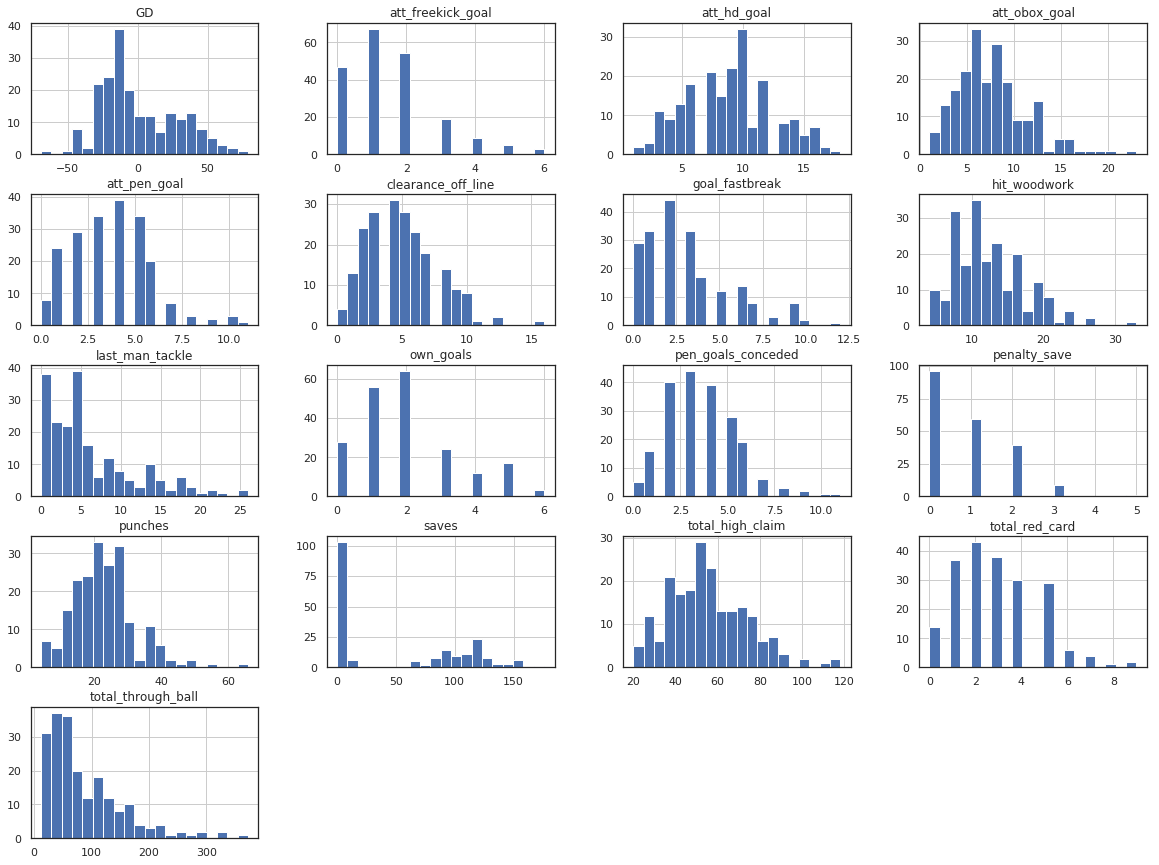

In [0]:
"""Checking the distribution of each of the covariate we are left with
after getting rid of the highly correlated covariates"""

X_VIF_1.hist(bins=20, figsize=(20,15))
plt.show()

In [0]:
model_one_ols = smf.ols('CL ~ total_red_card + hit_woodwork + att_hd_goal + att_pen_goal + att_freekick_goal + att_obox_goal + goal_fastbreak + saves \
                         + last_man_tackle + own_goals + pen_goals_conceded + total_through_ball + clearance_off_line + penalty_save + total_high_claim \
                         + punches + GD', data=train_data).fit()
print(model_one_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     CL   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     18.86
Date:                Wed, 22 May 2019   Prob (F-statistic):           2.29e-29
Time:                        03:17:56   Log-Likelihood:                 4.0682
No. Observations:                 171   AIC:                             27.86
Df Residuals:                     153   BIC:                             84.41
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0580      0

In [0]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression


In [0]:
model_one_pred_log = LogisticRegression()
model_one_pred_log.fit(X_train_1, y_train_1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
X_test_1 = X_test_1.fillna(0)
pred = model_one_pred_log.predict(X_test_1)

In [0]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_1, pred)

array([[33,  0],
       [ 0,  3]])

In [0]:
#Precision, Recall, and F-Score

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test_1, pred))
print(recall_score(y_test_1, pred))

1.0
1.0


In [0]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
pred_rnd_1 = rnd_clf.predict(X_test_1)

In [0]:
confusion_matrix(y_test_1, pred_rnd_1)

array([[33,  0],
       [ 0,  3]])

In [0]:
print(precision_score(y_test_1, pred_rnd_1))
print(recall_score(y_test_1, pred_rnd_1))

1.0
1.0


# Model Building (2 - Predicting Wins)

First question of interest for me was to see what covariates are associated with a team winning more matches because naturally if you win more matches you have a better channce of making it to the Champions League.

In [0]:
#seprating covariates from the labels
y_train_2 = train_data['wins']
y_test_2 = test_data['wins']
X_train_2 = train_data.copy()
X_test_2 = test_data.copy()

#removing labels, team names, and season from the X (covariate matrix)
X_train_2 = X_train_2.drop(['wins','team','season','CL','indexx'],axis=1)
X_train_2 = X_train_2.fillna(method="backfill")

X_test_2 = X_test_2.drop(['wins','CL','team','season'],axis=1)
X_test_2 = X_test_2.fillna(method="backfill")



In [0]:
X_VIF_2 = calculate_vif_(X_train_2)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'goals' at index: 1
dropping 'goals_conceded' at index: 14
dropping 'touches' at index: 30
dropping 'ontarget_scoring_att' at index: 4
dropping 'corner_taken' at index: 28
dropping 'total_scoring_att' at index: 3
dropping 'att_ibox_goal' at index: 7
dropping 'total_pass' at index: 21
dropping 'total_tackle' at index: 14
dropping 'penalty_conceded' at index: 18
dropping 'total_clearance' at index: 15
dropping 'total_cross' at index: 21
dropping 'total_long_balls' at index: 19
dropping 'dispossessed' at index: 22
dropping 'losses' at index: 0
dropping 'total_yel_card' at index: 0
dropping 'outfielder_block' at index: 10
dropping 'backward_pass' at index: 16
dropping 'interception' at index: 10
dropping 'head_clearance' at index: 11
dropping 'total_offside' at index: 7
dropping 'clean_sheet' at index: 7
dropping 'big_chance_missed' at index: 12
dropping 'hit_woodwork' at index: 1
dropping 'att_obox_goal' at index: 4
dropping 'total_high_claim' at index: 12
dropping 'punches' at i

In [0]:
print("The new columns that we have kept are: {}".format(list(X_VIF_2.columns)))

The new columns that we have kept are: ['total_red_card', 'att_pen_goal', 'att_freekick_goal', 'goal_fastbreak', 'saves', 'last_man_tackle', 'own_goals', 'pen_goals_conceded', 'clearance_off_line', 'penalty_save', 'GD']


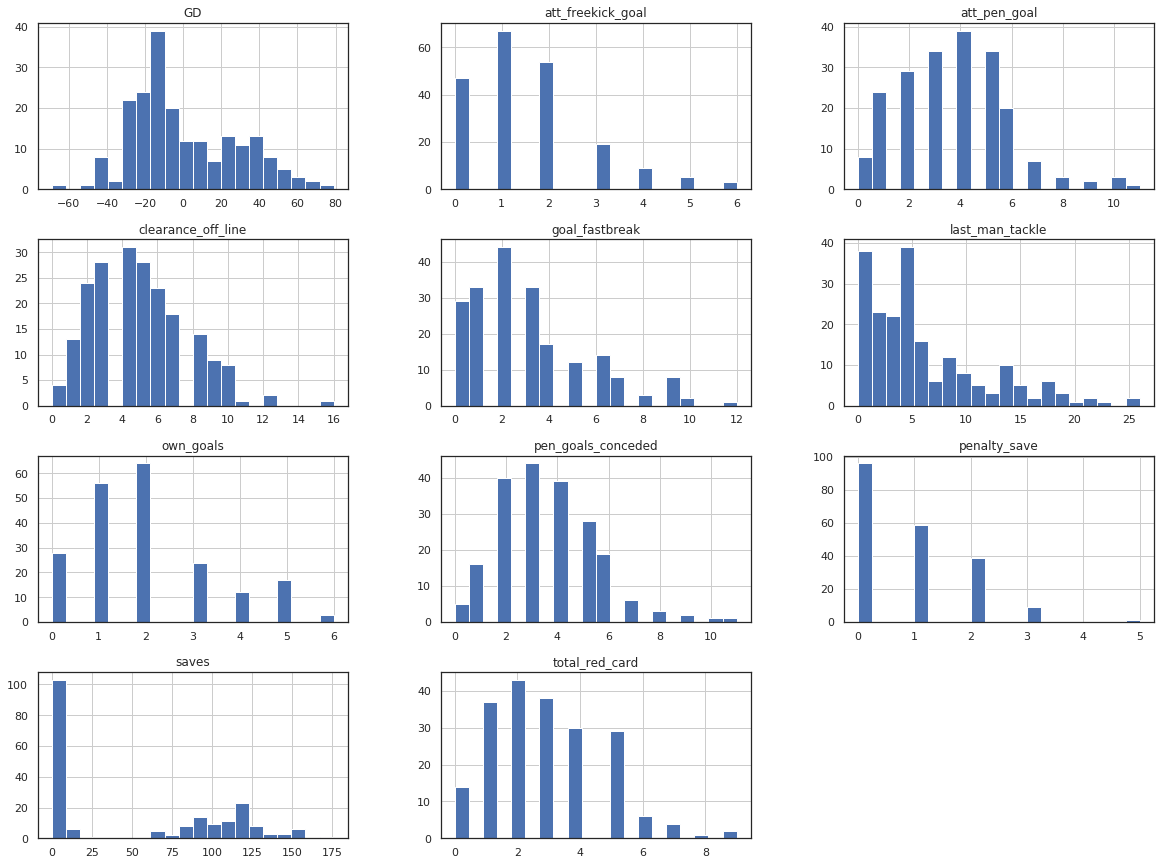

In [0]:
"""visualizing the distribution of our covariates in the training set"""
X_VIF_2.hist(bins=20, figsize=(20,15))
plt.show()

In [0]:
model_two_ols = smf.ols('wins ~ total_red_card + att_pen_goal + att_freekick_goal + goal_fastbreak + saves + last_man_tackle + own_goals + pen_goals_conceded + clearance_off_line + penalty_save + GD', data=train_data).fit()
print(model_two_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 22 May 2019   Prob (F-statistic):           9.91e-86
Time:                        03:18:02   Log-Likelihood:                -374.87
No. Observations:                 185   AIC:                             773.7
Df Residuals:                     173   BIC:                             812.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.2167      0

From the regression above, we can see that many of the variables are statistically insignificant because of the high p value. The only ones that are statistically significant are __GD (Goal Difference) and saves__. Let's run the regression model again using these variables only. 

In [0]:
model_two_ols_2 = smf.ols('wins ~ GD + saves', data=train_data).fit()
print(model_two_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     927.8
Date:                Wed, 22 May 2019   Prob (F-statistic):           3.45e-96
Time:                        03:18:02   Log-Likelihood:                -377.69
No. Observations:                 185   AIC:                             761.4
Df Residuals:                     182   BIC:                             771.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9715      0.188     74.391      0.0

Here we can see that the __$R^{2}$__ has not dropped much as it only went from $91.3%$ to $91.1%$. Both the variables are statistically significant, however Goal Difference is more sigificant than saves and contributes more to the wins. 

We can interpret the above regression equation as follows:
1) a unit increase in the Goal Difference corresponds to an increase of 0.2157 in the matches won, with all other variables kept constant
2) a unit increase in the number of saves corresponds to an increase of 0.0049 in the matches won, with all other variables kept constant.

However, since even saves is not a very important covariate statistically, we will run our regression again without it to see how the results differ.

In [0]:
model_two_ols_3 = smf.ols('wins ~ GD', data=train_data).fit()
print(model_two_ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2093.
Date:                Wed, 22 May 2019   Prob (F-statistic):          1.49e-108
Time:                        03:18:02   Log-Likelihood:                -414.87
No. Observations:                 204   AIC:                             833.7
Df Residuals:                     202   BIC:                             840.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2209      0.130    109.295      0.0

We can see that our model actually improved as the _$R^{2}$_ actually slightly went up indicating that our model hasn't lost any predictive ability. 

In [0]:
# Ridge Regression model

from sklearn.linear_model import Ridge

def ridge_regression_model(X_train, y_train, X_test, y_test):
    ridge_reg = Ridge(alpha=1, solver="cholesky")
    ridge_reg.fit(X_train, y_train)

    ridge_pred_2 = ridge_reg.predict(X_test)

    for i in range(len(y_test)):
        loss = 0
        print("Y is {} and our prediction is {}".format(list(y_test)[i],list(ridge_pred_2)[i]))
        err = np.square(list(y_test)[i] - list(ridge_pred_2)[i])
        loss += err
    print()
    print("Squared Loss is {}".format(loss))

X_test_2 = np.nan_to_num(X_test_2)
ridge_regression_model(X_train_2, y_train_2, X_test_2, y_test_2)

Y is 19 and our prediction is 18.65120024446082
Y is 16 and our prediction is 15.77164974486329
Y is 11 and our prediction is 15.57660742869775
Y is 13 and our prediction is 11.116176631930157
Y is 19 and our prediction is 16.624867948154876
Y is 11 and our prediction is 11.644748849264255
Y is 10 and our prediction is 11.817076116129183
Y is 13 and our prediction is 14.80869830480686
Y is 14 and our prediction is 14.672425892353665
Y is 24 and our prediction is 22.122057407404853
Y is 17 and our prediction is 18.321614411092575
Y is 17 and our prediction is 18.57473185212894
Y is 11 and our prediction is 9.559782928377867
Y is 15 and our prediction is 13.793967457652542
Y is 11 and our prediction is 13.58374337445577
Y is 11 and our prediction is 11.442663547068642
Y is 18 and our prediction is 17.15764943150068
Y is 10 and our prediction is 9.320592898468082
Y is 11 and our prediction is 13.035451792430234
Y is 16 and our prediction is 17.186172116219126
Y is 14 and our prediction is

In [0]:
#Lasso Regression Model

from sklearn.linear_model import Lasso

def lasso_regression_model(X_train, y_train, X_test, y_test):
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X_train, y_train)

    lasso_pred_2 = lasso_reg.predict(X_test)

    for i in range(len(y_test)):
        loss_lasso = 0
        print("Y is {} and our prediction is {}".format(list(y_test)[i],list(lasso_pred_2)[i]))
        err_lasso = np.square(list(y_test)[i] - list(lasso_pred_2)[i])
        loss_lasso += err_lasso
    print()
    print("Squared Loss is {}".format(loss_lasso))

    
lasso_regression_model(X_train_2, y_train_2, X_test_2, y_test_2)

Y is 19 and our prediction is 18.530400435614098
Y is 16 and our prediction is 15.791912833488421
Y is 11 and our prediction is 15.60428300903492
Y is 13 and our prediction is 11.336289434562616
Y is 19 and our prediction is 15.969744326390137
Y is 11 and our prediction is 11.894189784691111
Y is 10 and our prediction is 11.694829763342637
Y is 13 and our prediction is 14.731582912492968
Y is 14 and our prediction is 14.782827122846053
Y is 24 and our prediction is 21.994009075359926
Y is 17 and our prediction is 18.127173338701667
Y is 17 and our prediction is 18.464430182810403
Y is 11 and our prediction is 9.720709211780381
Y is 15 and our prediction is 13.962524706930957
Y is 11 and our prediction is 13.279076493019325
Y is 11 and our prediction is 11.224040882991726
Y is 18 and our prediction is 16.901043006338465
Y is 10 and our prediction is 9.417017763204932
Y is 11 and our prediction is 12.6413608006835
Y is 16 and our prediction is 16.989326590159806
Y is 14 and our predictio

In [0]:
# Support Vector Regression

from sklearn.svm import LinearSVR

def svm_regression_model(X_train, y_train, X_test, y_test):
    
    svm_reg = LinearSVR(epsilon=1.5)
    svm_reg.fit(X_train, y_train)

    svr_pred_2 = svm_reg.predict(X_test)

    for i in range(len(y_test)):
        loss_svr = 0
        print("Y is {} and our prediction is {}".format(list(y_test)[i],list(svr_pred_2)[i]))
        err_svr = np.square(list(y_test)[i] - list(svr_pred_2)[i])
        loss_svr += err_svr
    print()
    print("Squared Loss is {}".format(loss_svr))

    
svm_regression_model(X_train_2, y_train_2, X_test_2, y_test_2)

Y is 19 and our prediction is 11.585658213227969
Y is 16 and our prediction is 14.028854769083768
Y is 11 and our prediction is 16.554063303714006
Y is 13 and our prediction is 15.015017515688305
Y is 19 and our prediction is 13.08838811664714
Y is 11 and our prediction is 10.841391127295012
Y is 10 and our prediction is 11.334041993279527
Y is 13 and our prediction is 15.555940628715195
Y is 14 and our prediction is 15.0037939136551
Y is 24 and our prediction is 22.001945753051817
Y is 17 and our prediction is 13.673939105749579
Y is 17 and our prediction is 16.090211893851567
Y is 11 and our prediction is 14.111360966761215
Y is 15 and our prediction is 14.685514055603617
Y is 11 and our prediction is 11.966325507652716
Y is 11 and our prediction is 14.765874201081186
Y is 18 and our prediction is 13.6677481727356
Y is 10 and our prediction is 13.55897550891569
Y is 11 and our prediction is 11.790596969770679
Y is 16 and our prediction is 17.654040335744472
Y is 14 and our prediction

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Gradient Boost Method - Performed Best

from sklearn.ensemble import GradientBoostingRegressor

def gbrt_regression_model(X_train, y_train, X_test, y_test):
    gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
    gbrt.fit(X_train_2, y_train_2)

    gbrt_pred_2 = gbrt.predict(X_test_2)

    for i in range(len(y_test_2)):
        loss_gbrt = 0
        print("Y is {} and our prediction is {}".format(list(y_test_2)[i],list(gbrt_pred_2)[i]))
        err_gbrt = np.square(list(y_test_2)[i] - list(gbrt_pred_2)[i])
        loss_gbrt += err_gbrt
    print()
    print("Squared Loss is {}".format(loss_gbrt))

gbrt_regression_model(X_train_2, y_train_2, X_test_2, y_test_2)

Y is 19 and our prediction is 20.198644033511375
Y is 16 and our prediction is 13.316683249197643
Y is 11 and our prediction is 13.316683249197643
Y is 13 and our prediction is 12.096860108262437
Y is 19 and our prediction is 13.316683249197643
Y is 11 and our prediction is 12.766971799587637
Y is 10 and our prediction is 9.110408739393721
Y is 13 and our prediction is 12.096860108262437
Y is 14 and our prediction is 11.857576435602624
Y is 24 and our prediction is 18.739537219916354
Y is 17 and our prediction is 20.198644033511375
Y is 17 and our prediction is 20.198644033511375
Y is 11 and our prediction is 9.110408739393721
Y is 15 and our prediction is 13.316683249197643
Y is 11 and our prediction is 12.096860108262437
Y is 11 and our prediction is 9.780520430718921
Y is 18 and our prediction is 20.198644033511375
Y is 10 and our prediction is 6.4745663018509845
Y is 11 and our prediction is 12.096860108262437
Y is 16 and our prediction is 20.198644033511375
Y is 14 and our predict

# Model Building (3- Predicting Goals Scored)

As we saw in the Regression results above, Goal Difference is a statistically significant covariate. To measure a team's offensive ability, number of Goals Scored is an intuitive measure. Now we will try to build a model that tries to model number of Goals Scored as a target variable. 

In [0]:
#seprating covariates from the labels
y_train_3 = train_data['goals']
y_test_3 = test_data['goals']
X_train_3 = train_data.copy()
X_test_3 = test_data.copy()

#removing labels, team names, and season from the X (covariate matrix)
X_train_3 = X_train_3.drop(['wins','team','season','CL','goals','GD','indexx'],axis=1)
X_train_3 = X_train_3.fillna(method="backfill")

X_test_3 = X_test_3.drop(['wins','CL','team','season','goals','GD'],axis=1)
X_test_3 = X_test_3.fillna(method="backfill")


In [0]:
X_VIF_3 = calculate_vif_(X_train_3,10)

dropping 'touches' at index: 31
dropping 'ontarget_scoring_att' at index: 4
dropping 'corner_taken' at index: 29
dropping 'total_scoring_att' at index: 3
dropping 'total_pass' at index: 23
dropping 'goals_conceded' at index: 12
dropping 'total_tackle' at index: 15
dropping 'penalty_conceded' at index: 19
dropping 'total_clearance' at index: 16
dropping 'total_long_balls' at index: 20
dropping 'total_cross' at index: 21
dropping 'dispossessed' at index: 23
dropping 'att_ibox_goal' at index: 7
dropping 'total_yel_card' at index: 1
dropping 'outfielder_block' at index: 11
dropping 'backward_pass' at index: 17
dropping 'interception' at index: 11
dropping 'head_clearance' at index: 12
dropping 'total_offside' at index: 8
dropping 'big_chance_missed' at index: 14
dropping 'losses' at index: 0
dropping 'clean_sheet' at index: 7
Remaining variables:
Index(['total_red_card', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal',
       'att_freekick_goal', 'att_obox_goal', 'goal_fastbreak', 'saves',
 

In [0]:
print("The new columns that we have kept are: {}".format(list(X_VIF_3.columns)))

The new columns that we have kept are: ['total_red_card', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_obox_goal', 'goal_fastbreak', 'saves', 'last_man_tackle', 'own_goals', 'pen_goals_conceded', 'total_through_ball', 'clearance_off_line', 'penalty_save', 'total_high_claim', 'punches']


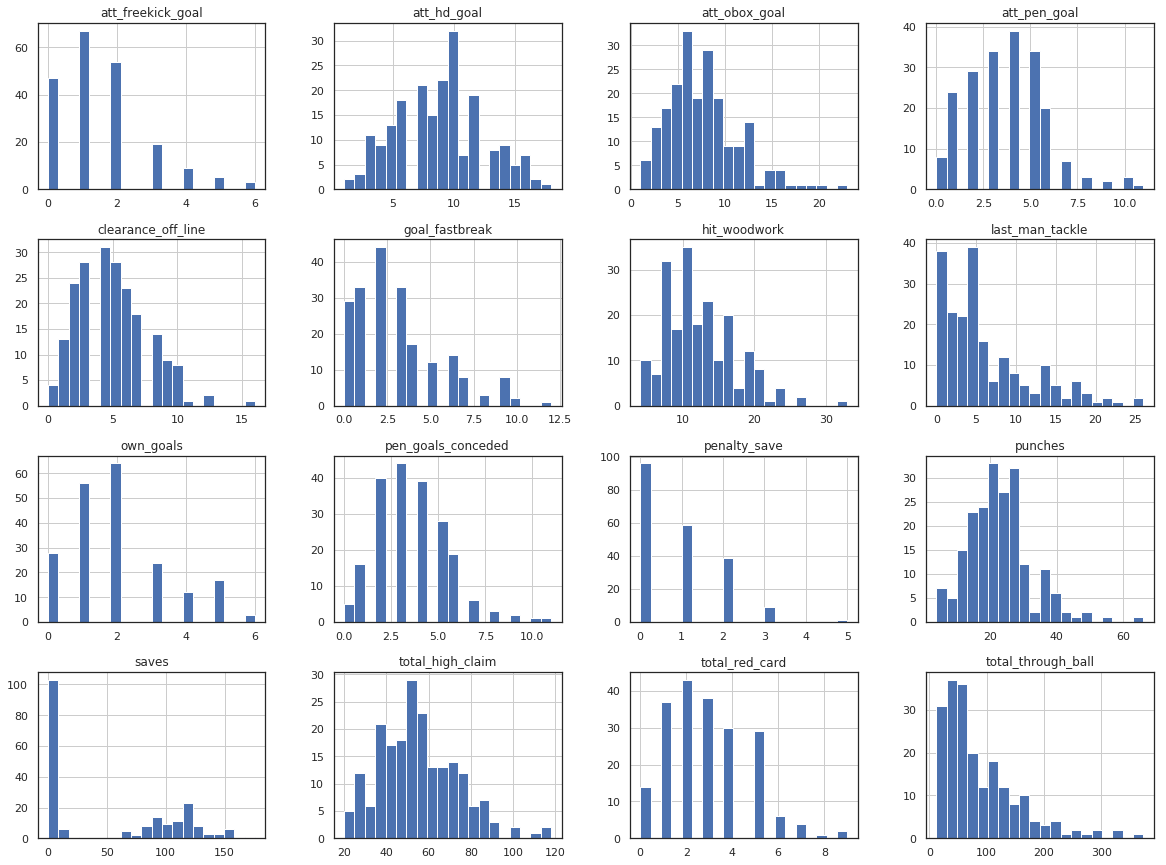

In [0]:
"""visualizing the distribution of our covariates in the training set"""

X_VIF_3.hist(bins=20, figsize=(20,15))
plt.show()

In [0]:
model_three_ols_1 = smf.ols('goals ~ total_red_card + hit_woodwork + att_hd_goal + att_pen_goal + att_freekick_goal + att_obox_goal + goal_fastbreak + saves \
                            + last_man_tackle + own_goals + pen_goals_conceded + total_through_ball + clearance_off_line + penalty_save + total_high_claim \
                            + punches', data=train_data).fit()
print(model_three_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     52.41
Date:                Wed, 22 May 2019   Prob (F-statistic):           6.93e-54
Time:                        03:30:00   Log-Likelihood:                -569.15
No. Observations:                 171   AIC:                             1172.
Df Residuals:                     154   BIC:                             1226.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.8042      4

Model 3 has credible predictive power indicated by the $84.5 R^{2}$. Out of the variable we ended up using, some are statistically significant while some are not. 

- Statistically significant variables: __hit_woodwork, att_hd_goal, att_pen_goal, att_obox_goal, goal_fastbreak, last_man_tackle, own_goals, total_through_ball, clearance_off_line, total_high_claim__

Let's try running our model with only these covariates:

In [0]:
model_three_ols_2 = smf.ols('goals ~ hit_woodwork + att_hd_goal + att_pen_goal+ att_obox_goal + goal_fastbreak + last_man_tackle + own_goals \
                            + total_through_ball + clearance_off_line + total_high_claim', data=train_data).fit()
print(model_three_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     84.26
Date:                Wed, 22 May 2019   Prob (F-statistic):           2.78e-62
Time:                        03:30:04   Log-Likelihood:                -641.50
No. Observations:                 190   AIC:                             1305.
Df Residuals:                     179   BIC:                             1341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.4414      3

However, we have lost a few percet on the __$R^{2}$__, the Akaike Information Criterion (AIC), Bayesin Information Criterion (BIC), and F-Stastic of this new model have improved. 

All the covariates here are statistically significant. 

According to the regression equation:

1) 1 unit increase in hit_woodwork corresponds to 0.5699 unit increase in number of goals scored

2) 1 unit increase in att_hd_goal corresponds to 1.1733 unit increase in number of goals scored

3) 1 unit increase in att_pen_goal corresponds to 1.8313 unit increase in number of goals scored

4) 1 unit increase in att_obox_goal corresponds to 1.5447 unit increase in number of goals scored

5) 1 unit increase in goal_fastbreak corresponds to 0.8578 unit increase in number of goals scored

6) 1 unit increase in last_man_clearance corresponds to 0.3857 unit decrease in number of goals scored

7) 1 unit increase in own_goals corresponds to 0.8480 unit decrease in number of goals scored

8) 1 unit increase in total_through_ball corresponds to 0.0749 unit increase in number of goals scored

9) 1 unit increase in clearance_off_line corresponds to 0.6818 unit decrease in number of goals scored

10) 1 unit increase in total_high_claim corresponds to 0.0766 unit decrease in number of goals scored

In [0]:
# Ridge Regression model

X_test_3 = np.nan_to_num(X_test_3)
ridge_regression_model(X_train_3, y_train_3, X_test_3, y_test_3)

Y is 55 and our prediction is 54.9495933424509
Y is 52 and our prediction is 51.99618670986288
Y is 49 and our prediction is 49.09592457858474
Y is 45 and our prediction is 44.959386285586966
Y is 56 and our prediction is 55.97468565644649
Y is 46 and our prediction is 45.974166359450614
Y is 48 and our prediction is 48.75006409790933
Y is 51 and our prediction is 51.057606811748485
Y is 45 and our prediction is 44.92509288945236
Y is 68 and our prediction is 67.85062808758369
Y is 55 and our prediction is 55.02952268092313
Y is 62 and our prediction is 61.920382686786375
Y is 42 and our prediction is 41.97954127276153
Y is 48 and our prediction is 48.02330988355993
Y is 45 and our prediction is 45.10041804263858
Y is 45 and our prediction is 44.847432216642694
Y is 59 and our prediction is 59.00986697080316
Y is 32 and our prediction is 32.006579830020044
Y is 40 and our prediction is 39.944785774570114
Y is 55 and our prediction is 55.0202099734497
Y is 53 and our prediction is 52.94

In [0]:
#Lasso Regression Model

lasso_regression_model(X_train_3, y_train_3, X_test_3, y_test_3)

Y is 55 and our prediction is 54.95945832638641
Y is 52 and our prediction is 51.99428480038154
Y is 49 and our prediction is 49.09686689692194
Y is 45 and our prediction is 44.95716995826502
Y is 56 and our prediction is 55.86739140172898
Y is 46 and our prediction is 46.00694938325441
Y is 48 and our prediction is 48.74235311199292
Y is 51 and our prediction is 51.007052148818424
Y is 45 and our prediction is 44.97851533663204
Y is 68 and our prediction is 67.97939287307668
Y is 55 and our prediction is 54.947023412419576
Y is 62 and our prediction is 61.96646522069766
Y is 42 and our prediction is 41.90688743192615
Y is 48 and our prediction is 47.986320181087706
Y is 45 and our prediction is 44.941985854365115
Y is 45 and our prediction is 44.820443483587
Y is 59 and our prediction is 59.00237758724529
Y is 32 and our prediction is 32.03412461825764
Y is 40 and our prediction is 39.95636447775438
Y is 55 and our prediction is 55.03081457549317
Y is 53 and our prediction is 52.96887

In [0]:
# Support Vector Regression

svm_regression_model(X_train_3, y_train_3, X_test_3, y_test_3)

Y is 55 and our prediction is 39.91234864726112
Y is 52 and our prediction is 39.8762129290165
Y is 49 and our prediction is 54.78281192501441
Y is 45 and our prediction is 50.469419003531556
Y is 56 and our prediction is 44.93926551903198
Y is 46 and our prediction is 39.60791084886186
Y is 48 and our prediction is 36.91603405602
Y is 51 and our prediction is 52.20963437460382
Y is 45 and our prediction is 42.356908831020235
Y is 68 and our prediction is 65.81903011617923
Y is 55 and our prediction is 44.868843666453984
Y is 62 and our prediction is 49.50267076540513
Y is 42 and our prediction is 49.00197389970314
Y is 48 and our prediction is 46.56250067889116
Y is 45 and our prediction is 42.46108557910943
Y is 45 and our prediction is 46.85133380209821
Y is 59 and our prediction is 48.962813121573575
Y is 32 and our prediction is 40.10582446167051
Y is 40 and our prediction is 38.04800585756152
Y is 55 and our prediction is 58.822713895261394
Y is 53 and our prediction is 49.034849

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Gradient Boost Method - Performed Best

gbrt_regression_model(X_train_3, y_train_3, X_test_3, y_test_3)

Y is 19 and our prediction is 20.198644033511375
Y is 16 and our prediction is 13.316683249197643
Y is 11 and our prediction is 13.316683249197643
Y is 13 and our prediction is 12.096860108262439
Y is 19 and our prediction is 13.316683249197643
Y is 11 and our prediction is 12.766971799587637
Y is 10 and our prediction is 9.110408739393723
Y is 13 and our prediction is 12.096860108262439
Y is 14 and our prediction is 11.857576435602622
Y is 24 and our prediction is 18.739537219916354
Y is 17 and our prediction is 20.198644033511375
Y is 17 and our prediction is 20.198644033511375
Y is 11 and our prediction is 9.110408739393723
Y is 15 and our prediction is 13.316683249197643
Y is 11 and our prediction is 12.096860108262439
Y is 11 and our prediction is 9.780520430718921
Y is 18 and our prediction is 20.198644033511375
Y is 10 and our prediction is 6.474566301850985
Y is 11 and our prediction is 12.096860108262439
Y is 16 and our prediction is 20.198644033511375
Y is 14 and our predicti

# Model Building (4 - Predicting Goals Conceded)

In [0]:
#seprating covariates from the labels
y_train_4 = train_data['goals_conceded']
y_test_4 = test_data['goals_conceded']
X_train_4 = train_data.copy()
X_test_4 = test_data.copy()

#removing labels, team names, and season from the X (covariate matrix)
X_train_4 = X_train_4.drop(['wins','team','season','CL','goals_conceded','GD','indexx'],axis=1)
X_train_4 = X_train_4.fillna(method="backfill")

X_test_4 = X_test_4.drop(['wins','CL','team','season','goals_conceded','GD'],axis=1)
X_test_4 = X_test_4.fillna(method="backfill")
X_test_4 = np.nan_to_num(X_test_4)

X_test_4 = np.nan_to_num(X_test_4)

In [0]:
X_VIF_4 = calculate_vif_(X_train_4,10)

dropping 'goals' at index: 1
dropping 'touches' at index: 30
dropping 'ontarget_scoring_att' at index: 4
dropping 'corner_taken' at index: 28
dropping 'total_scoring_att' at index: 3
dropping 'total_pass' at index: 22
dropping 'total_tackle' at index: 15
dropping 'penalty_conceded' at index: 19
dropping 'total_clearance' at index: 16
dropping 'total_long_balls' at index: 20
dropping 'total_cross' at index: 21
dropping 'dispossessed' at index: 23
dropping 'att_ibox_goal' at index: 7
dropping 'total_yel_card' at index: 1
dropping 'outfielder_block' at index: 11
dropping 'backward_pass' at index: 17
dropping 'interception' at index: 11
dropping 'head_clearance' at index: 12
dropping 'total_offside' at index: 8
dropping 'big_chance_missed' at index: 14
dropping 'losses' at index: 0
dropping 'clean_sheet' at index: 7
Remaining variables:
Index(['total_red_card', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal',
       'att_freekick_goal', 'att_obox_goal', 'goal_fastbreak', 'saves',
       'las

In [0]:
print("The new columns that we have kept are: {}".format(list(X_VIF_4.columns)))

The new columns that we have kept are: ['total_red_card', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_obox_goal', 'goal_fastbreak', 'saves', 'last_man_tackle', 'own_goals', 'pen_goals_conceded', 'total_through_ball', 'clearance_off_line', 'penalty_save', 'total_high_claim', 'punches']


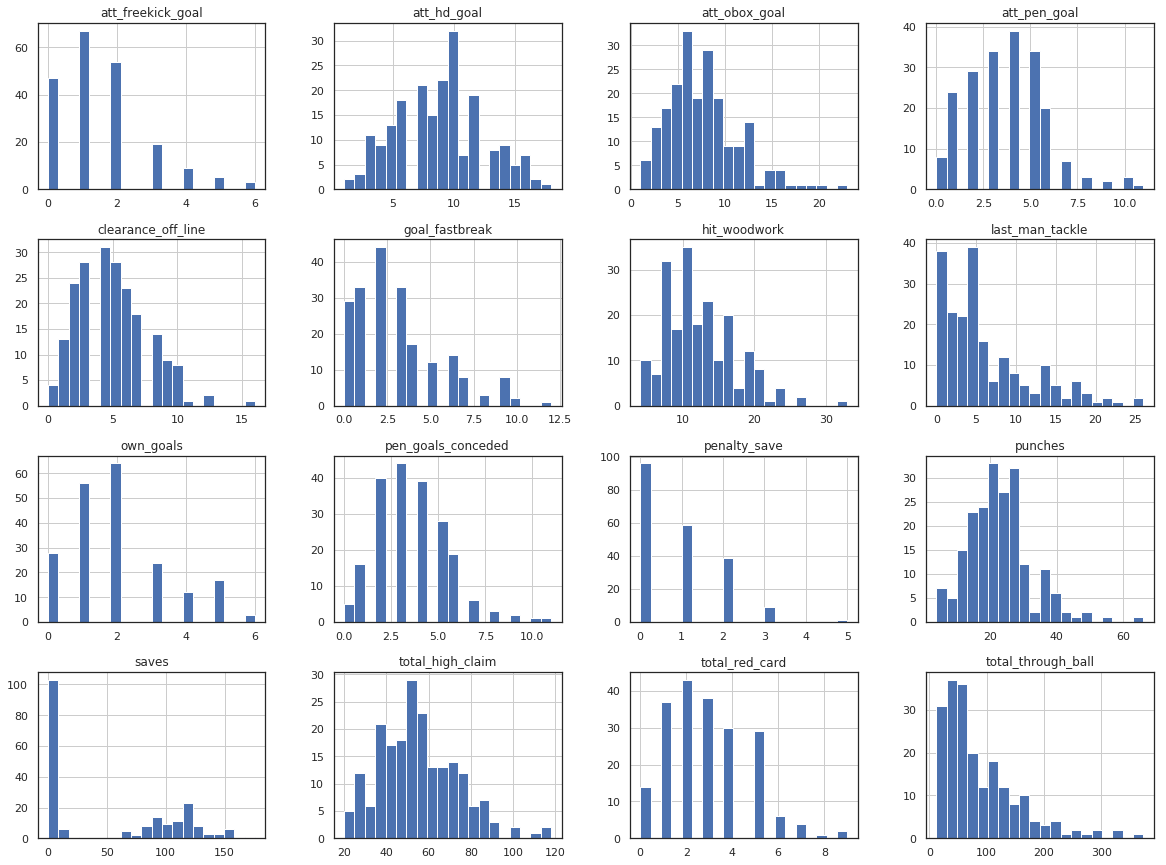

In [0]:
"""visualizing the distribution of our covariates in the training set"""

X_VIF_4.hist(bins=20, figsize=(20,15))
plt.show()

In [0]:
model_four_ols_1 = smf.ols('goals_conceded ~ total_red_card + hit_woodwork + att_hd_goal + att_pen_goal + att_freekick_goal + att_obox_goal\
                            + goal_fastbreak + saves + last_man_tackle + total_through_ball + clearance_off_line \
                            + penalty_save + total_high_claim + punches', data=train_data).fit()
print(model_four_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:         goals_conceded   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     9.819
Date:                Wed, 22 May 2019   Prob (F-statistic):           1.84e-15
Time:                        03:31:21   Log-Likelihood:                -635.05
No. Observations:                 171   AIC:                             1300.
Df Residuals:                     156   BIC:                             1347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             54.4292      6

In [0]:
model_four_ols_2 = smf.ols('goals_conceded ~ att_obox_goal + last_man_tackle + total_through_ball + clearance_off_line', data=train_data).fit()
print(model_four_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:         goals_conceded   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     32.47
Date:                Wed, 22 May 2019   Prob (F-statistic):           1.69e-20
Time:                        03:31:24   Log-Likelihood:                -714.85
No. Observations:                 190   AIC:                             1440.
Df Residuals:                     185   BIC:                             1456.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             58.1046      2

In [0]:
len(y_test_4)

36

In [0]:
# Ridge Regression

ridge_regression_model(X_train_4, y_train_4, X_test_4, y_test_4)

Y is 33 and our prediction is 45.8056450457049
Y is 47 and our prediction is 48.58397390592316
Y is 43 and our prediction is 45.871107125272445
Y is 52 and our prediction is 57.84569197253952
Y is 51 and our prediction is 45.0428895161573
Y is 55 and our prediction is 57.81615775305109
Y is 68 and our prediction is 55.000966700154066
Y is 45 and our prediction is 48.23149810258281
Y is 42 and our prediction is 44.028382959289964
Y is 41 and our prediction is 35.94898724782374
Y is 37 and our prediction is 37.21718337847107
Y is 44 and our prediction is 46.39937452047679
Y is 62 and our prediction is 59.205595528729916
Y is 45 and our prediction is 51.84313436161209
Y is 46 and our prediction is 51.7713156974955
Y is 61 and our prediction is 59.697512235800986
Y is 41 and our prediction is 45.454510314590465
Y is 55 and our prediction is 59.56712727160746
Y is 51 and our prediction is 51.43344492780548
Y is 40 and our prediction is 41.74191831316721
Y is 57 and our prediction is 59.9725

In [0]:
# Lasso Regression

lasso_regression_model(X_train_4, y_train_4, X_test_4, y_test_4)

Y is 33 and our prediction is 45.93332640067414
Y is 47 and our prediction is 48.22675374290046
Y is 43 and our prediction is 45.50257832327522
Y is 52 and our prediction is 58.07596654990604
Y is 51 and our prediction is 45.48399777410272
Y is 55 and our prediction is 57.44829518712555
Y is 68 and our prediction is 54.49958095887155
Y is 45 and our prediction is 48.11127809196812
Y is 42 and our prediction is 44.25594129336379
Y is 41 and our prediction is 36.23742801649635
Y is 37 and our prediction is 37.10147983925477
Y is 44 and our prediction is 46.38078662464581
Y is 62 and our prediction is 59.69725315913055
Y is 45 and our prediction is 52.13653778937774
Y is 46 and our prediction is 51.377296527538036
Y is 61 and our prediction is 60.11920977040253
Y is 41 and our prediction is 45.624837010459075
Y is 55 and our prediction is 59.589382343745584
Y is 51 and our prediction is 51.76367715632101
Y is 40 and our prediction is 41.752769604530144
Y is 57 and our prediction is 60.191

In [0]:
# SVM Regression

svm_regression_model(X_train_4, y_train_4, X_test_4, y_test_4)

Y is 33 and our prediction is 77.98503789662126
Y is 47 and our prediction is 55.49518130124403
Y is 43 and our prediction is 70.71182875669494
Y is 52 and our prediction is 60.93120598231116
Y is 51 and our prediction is 69.29048618352623
Y is 55 and our prediction is 80.66080884858002
Y is 68 and our prediction is 74.35837353487796
Y is 45 and our prediction is 68.99035771936784
Y is 42 and our prediction is 54.76912928611206
Y is 41 and our prediction is 66.16884711926227
Y is 37 and our prediction is 82.5539032097459
Y is 44 and our prediction is 79.2082299633414
Y is 62 and our prediction is 68.26276149579205
Y is 45 and our prediction is 72.92907410112723
Y is 46 and our prediction is 73.66691929869258
Y is 61 and our prediction is 68.93675996564967
Y is 41 and our prediction is 79.4719350250927
Y is 55 and our prediction is 54.55413706011948
Y is 51 and our prediction is 69.2989869846007
Y is 40 and our prediction is 65.40169896173248
Y is 57 and our prediction is 58.33014062862

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Gradient Booster

gbrt_regression_model(X_train_4, y_train_4, X_test_4, y_test_4)

Y is 19 and our prediction is 20.198644033511375
Y is 16 and our prediction is 13.316683249197641
Y is 11 and our prediction is 13.316683249197641
Y is 13 and our prediction is 12.096860108262437
Y is 19 and our prediction is 13.316683249197641
Y is 11 and our prediction is 12.766971799587637
Y is 10 and our prediction is 9.110408739393721
Y is 13 and our prediction is 12.096860108262437
Y is 14 and our prediction is 11.857576435602622
Y is 24 and our prediction is 18.739537219916354
Y is 17 and our prediction is 20.198644033511375
Y is 17 and our prediction is 20.198644033511375
Y is 11 and our prediction is 9.110408739393721
Y is 15 and our prediction is 13.316683249197641
Y is 11 and our prediction is 12.096860108262437
Y is 11 and our prediction is 9.780520430718921
Y is 18 and our prediction is 20.198644033511375
Y is 10 and our prediction is 6.474566301850985
Y is 11 and our prediction is 12.096860108262437
Y is 16 and our prediction is 20.198644033511375
Y is 14 and our predicti